<a href="https://colab.research.google.com/github/KavishaMadani/machine-learning/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Question 1
Implement the gradient descent on each of the following functions to find the value of the weights (w∗
),

which minimize the function f(w). Note that w is a vector, w ∈ R2
.

1. f(w) = (w1)^2 +(w2)^2 +5


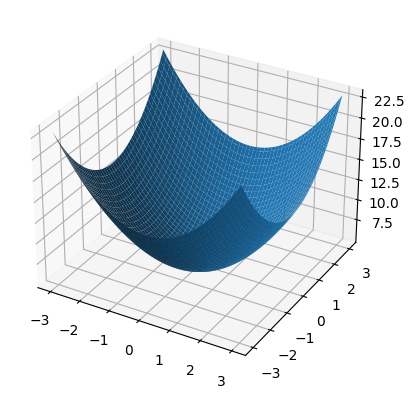

In [ ]:
def f(w1,w2):
  return w1**2 + w2**2 + 5
w1_vals = w2_vals = np.linspace(-3, 3, 100)
W1, W2 = np.meshgrid(w1_vals, w2_vals)
Z = f(W1, W2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W1, W2, Z)
plt.show()

In [ ]:
import numpy as np
import sympy as sp
w1, w2 = sp.symbols('w1 w2')
f = w1**2 + w2**2 + 5
hessians = sp.hessian(f, (w1, w2))
nh = hessians.subs({w1: 1.0, w2: 2.0})
print(nh)
nhnp = np.array(nh, dtype=float)
print(nhnp)
eigenvalues = np.linalg.eigvals(nhnp)
print("Numerical Hessian Matrix:")
print(nhnp)
print("\nEigenvalues:")
print(eigenvalues)
if all(eigenvalues >= 0):
  print("Function is convex")
else:
  print("Function is concave")

Matrix([[2, 0], [0, 2]])
[[2. 0.]
 [0. 2.]]
Numerical Hessian Matrix:
[[2. 0.]
 [0. 2.]]

Eigenvalues:
[2. 2.]
Function is convex


In [ ]:
def objective_function(w):
    return w[0]**2 + w[1]**2 + 5
def gradient(w):
    return np.array([2 * w[0], 2 * w[1]])
def gradient_descent(initial_guess, learning_rate, max_iterations=1000, tolerance=1e-6):
    w = np.array(initial_guess)
    for _ in range(max_iterations):
        grad = gradient(w)
        w_new = w - learning_rate * grad
        if np.all(np.abs(w_new - w) < tolerance):
            break
        w = w_new
    return w
initial_guesses = [np.array([-1, 1])]
learning_rates = [0.001, 0.1, 0.5, 1, 5]
for initial_guess in initial_guesses:
    for learning_rate in learning_rates:
        optimized_param = gradient_descent(initial_guess, learning_rate)
        min_value = objective_function(optimized_param)
        print(f"Initial Guess: {initial_guess}, Learning Rate: {learning_rate}, Optimized Parameter: {optimized_param}, Minimum Value: {min_value}")

Initial Guess: [-1  1], Learning Rate: 0.001, Optimized Parameter: [-0.98017904  0.98017904], Minimum Value: 6.921501914052686
Initial Guess: [-1  1], Learning Rate: 0.1, Optimized Parameter: [-0.10737418  0.10737418], Minimum Value: 5.023058430092137
Initial Guess: [-1  1], Learning Rate: 0.5, Optimized Parameter: [0. 0.], Minimum Value: 5.0
Initial Guess: [-1  1], Learning Rate: 1, Optimized Parameter: [-1  1], Minimum Value: 7
Initial Guess: [-1  1], Learning Rate: 5, Optimized Parameter: [-3486784401  3486784401], Minimum Value: 5868586844404305991


<ipython-input-83-95ce1cf0619b>:2: RuntimeWarning: overflow encountered in long_scalars
  return w[0]**2 + w[1]**2 + 5


<ipython-input-83-95ce1cf0619b>:2: RuntimeWarning: overflow encountered in long_scalars
  return w[0]**2 + w[1]**2 + 5
<ipython-input-83-95ce1cf0619b>:4: RuntimeWarning: overflow encountered in long_scalars
  return np.array([2 * w[0], 2 * w[1]])


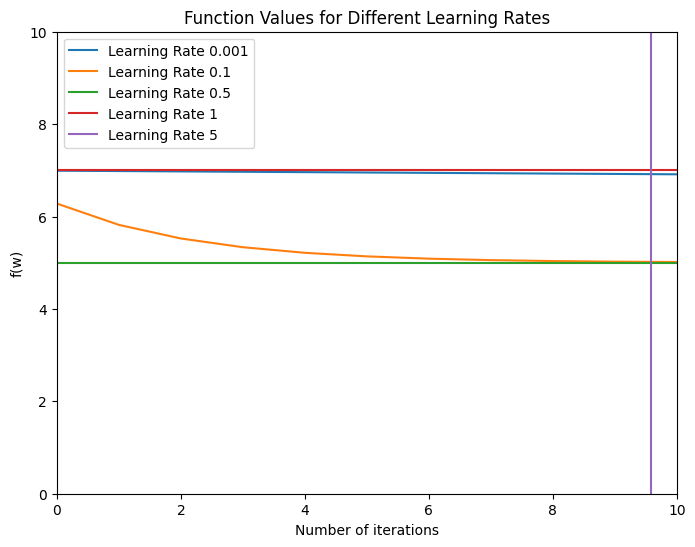

In [ ]:
def gradient_descent(initial_guess, learning_rate, max_iterations=1000, tolerance=1e-6):
    w = np.array(initial_guess)
    f_values = []
    for _ in range(max_iterations):
        grad = gradient(w)
        w = w - learning_rate * grad
        f_value = objective_function(w)
        f_values.append(f_value)
    return f_values
plt.figure(figsize=(8, 6))
for learning_rate in learning_rates:
    f_values = gradient_descent(initial_guess, learning_rate)
    plt.plot(f_values, label=f'Learning Rate {learning_rate}')
plt.xlabel("Number of iterations")
plt.ylabel("f(w)")
plt.title("Function Values for Different Learning Rates")
plt.legend()
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

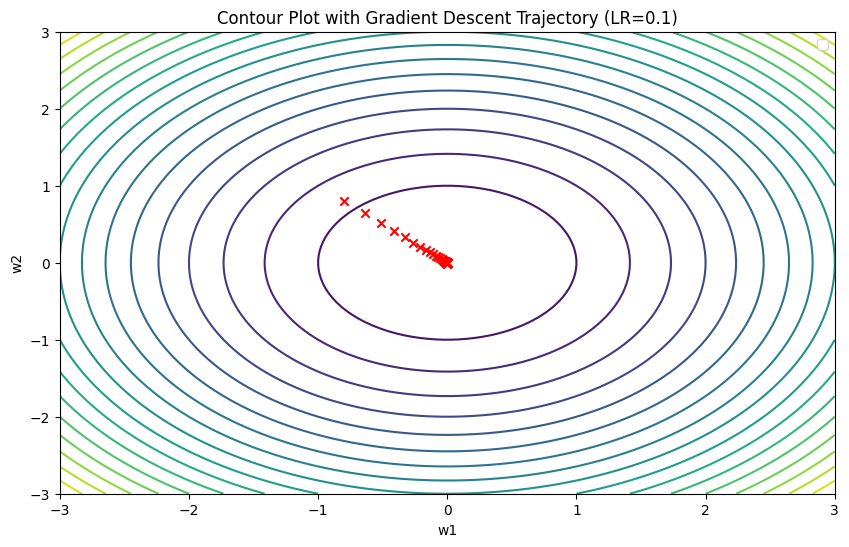

In [ ]:
def gradient_descent(initial_guess, learning_rate, max_iterations=1000, tolerance=1e-6):
    w = np.array(initial_guess)
    w_history = [w.copy()]
    for _ in range(max_iterations):
        grad = gradient(w)
        w = w - learning_rate * grad
        w_history.append(w.copy())
        if np.linalg.norm(grad) < tolerance:
            break
    return w_history
w1_vals = np.linspace(-3, 3, 100)
w2_vals = np.linspace(-3, 3, 100)
w1_mesh, w2_mesh = np.meshgrid(w1_vals, w2_vals)
f_values = objective_function([w1_mesh, w2_mesh])
learning_rate = 0.1
initial_guess = np.array([-1, 1])
w_history = gradient_descent(initial_guess, learning_rate)
plt.figure(figsize=(10, 6))
contour = plt.contour(w1_mesh, w2_mesh, f_values, levels=20, cmap='viridis')
plt.xlabel('w1')
plt.ylabel('w2')
for i in range(1, len(w_history)):
    plt.scatter(w_history[i][0], w_history[i][1], c='red', marker='x')
plt.legend()
plt.title('Contour Plot with Gradient Descent Trajectory (LR=0.1)')
plt.show()

2. f(w) = (w1)^2 +(w2)^2 - 6w1 +8w2 + 9


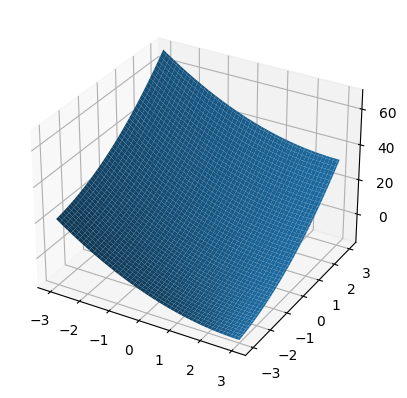

In [ ]:
def f(w1,w2):
  return w1**2 + w2**2 - 6*w1 +8*w2 +9
w1_vals = w2_vals = np.linspace(-3, 3, 100)
W1, W2 = np.meshgrid(w1_vals, w2_vals)
Z = f(W1, W2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W1, W2, Z)
plt.show()

In [ ]:
import numpy as np
import sympy as sp
w1, w2 = sp.symbols('w1 w2')
f = w1**2 + w2**2 - 6*w1 +8*w2 +9
hessians = sp.hessian(f, (w1, w2))
nh = hessians.subs({w1: 1.0, w2: 2.0})
print(nh)
nhnp = np.array(nh, dtype=float)
print(nhnp)
eigenvalues = np.linalg.eigvals(nhnp)
print("Numerical Hessian Matrix:")
print(nhnp)
print("\nEigenvalues:")
print(eigenvalues)
if all(eigenvalues >= 0):
  print("Function is convex")
else:
  print("Function is concave")

Matrix([[2, 0], [0, 2]])
[[2. 0.]
 [0. 2.]]
Numerical Hessian Matrix:
[[2. 0.]
 [0. 2.]]

Eigenvalues:
[2. 2.]
Function is convex


In [ ]:
def objective_function(w):
    return w[0]**2 + w[1]**2 - w[0]*6 + 8*w[1] + 9
def gradient(w):
    return np.array([2 * w[0] - 6, 2 * w[1] + 8])
def gradient_descent(initial_guess, learning_rate, max_iterations=10, tolerance=1e-6):
    w = np.array(initial_guess)
    for _ in range(max_iterations):
        grad = gradient(w)
        w_new = w - learning_rate * grad
        if np.all(np.abs(w_new - w) < tolerance):
            break
        w = w_new
    return w
initial_guesses = [np.array([-1, 1])]
learning_rates = [0.001, 0.1, 0.5, 1, 5]
for initial_guess in initial_guesses:
    for learning_rate in learning_rates:
        optimized_param = gradient_descent(initial_guess, learning_rate)
        min_value = objective_function(optimized_param)
        print(f"Initial Guess: {initial_guess}, Learning Rate: {learning_rate}, Optimized Parameter: {optimized_param}, Minimum Value: {min_value}")

Initial Guess: [-1  1], Learning Rate: 0.001, Optimized Parameter: [-0.92071617  0.90089522], Minimum Value: 23.390789238080053
Initial Guess: [-1  1], Learning Rate: 0.1, Optimized Parameter: [ 2.57050327 -3.46312909], Minimum Value: -15.527302183111196
Initial Guess: [-1  1], Learning Rate: 0.5, Optimized Parameter: [ 3. -4.], Minimum Value: -16.0
Initial Guess: [-1  1], Learning Rate: 1, Optimized Parameter: [-1  1], Minimum Value: 25
Initial Guess: [-1  1], Learning Rate: 5, Optimized Parameter: [-13947137601  17433922001], Minimum Value: 402193831176187193


<ipython-input-92-1009e65d02ed>:2: RuntimeWarning: overflow encountered in long_scalars
  return w[0]**2 + w[1]**2 - w[0]*6 + 8*w[1] + 9
<ipython-input-92-1009e65d02ed>:4: RuntimeWarning: overflow encountered in long_scalars
  return np.array([2 * w[0] - 6, 2 * w[1] + 8])


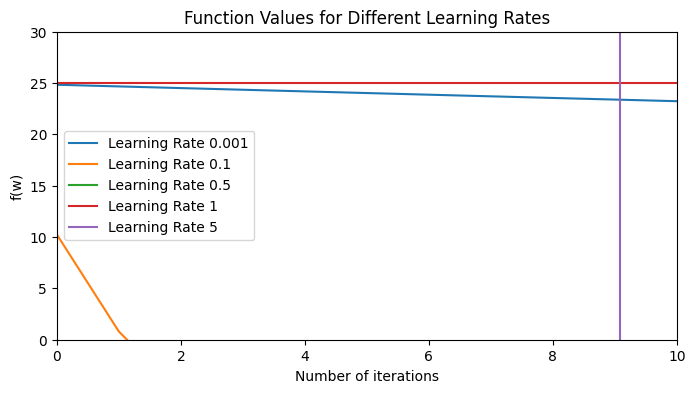

In [ ]:
def gradient_descent(initial_guess, learning_rate, max_iterations=20, tolerance=1e-6):
    w = np.array(initial_guess)
    f_values = []
    for _ in range(max_iterations):
        grad = gradient(w)
        w = w - learning_rate * grad
        f_value = objective_function(w)
        f_values.append(f_value)
    return f_values
plt.figure(figsize=(8,4))
for learning_rate in learning_rates:
    f_values = gradient_descent(initial_guess, learning_rate)
    plt.plot(f_values, label=f'Learning Rate {learning_rate}')
plt.xlabel("Number of iterations")
plt.ylabel("f(w)")
plt.title("Function Values for Different Learning Rates")
plt.legend()
plt.xlim(0, 10)
plt.ylim(0, 30)
plt.show()

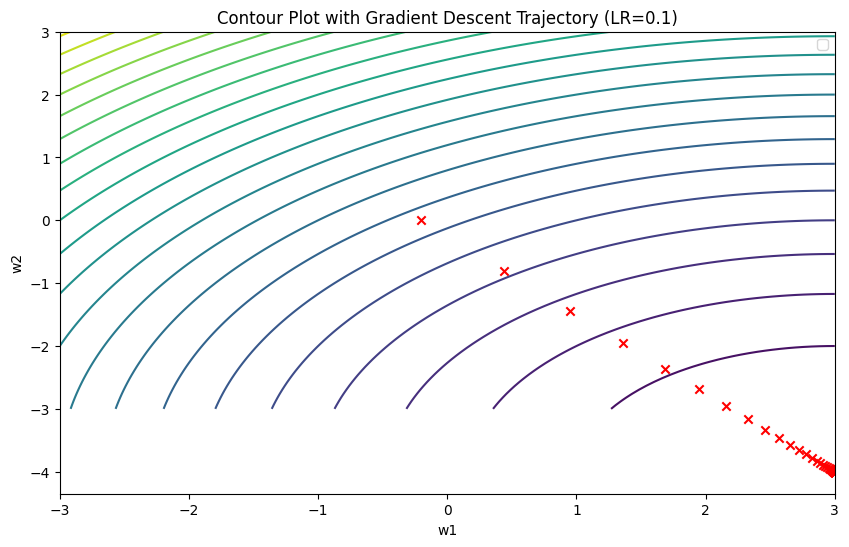

In [ ]:
def gradient_descent(initial_guess, learning_rate, max_iterations=1000, tolerance=1e-6):
    w = np.array(initial_guess)
    w_history = [w.copy()]  # Keep track of the parameter values at each iteration
    for _ in range(max_iterations):
        grad = gradient(w)
        w = w - learning_rate * grad
        w_history.append(w.copy())
        if np.linalg.norm(grad) < tolerance:
            break
    return w_history
w1_vals = np.linspace(-3, 3, 100)
w2_vals = np.linspace(-3, 3, 100)
w1_mesh, w2_mesh = np.meshgrid(w1_vals, w2_vals)
f_values = objective_function([w1_mesh, w2_mesh])
learning_rate = 0.1
initial_guess = np.array([-1, 1])
w_history = gradient_descent(initial_guess, learning_rate)
plt.figure(figsize=(10, 6))
contour = plt.contour(w1_mesh, w2_mesh, f_values, levels=20, cmap='viridis')
plt.xlabel('w1')
plt.ylabel('w2')
for i in range(1, len(w_history)):
    plt.scatter(w_history[i][0], w_history[i][1], c='red', marker='x')
plt.legend()
plt.title('Contour Plot with Gradient Descent Trajectory (LR=0.1)')
plt.show()

3.(w-1)^2

In [ ]:
def objective_function(w):
    return (w - 1)**2
def gradient(w):
    return 2 * (w - 1)
w = sp.symbols('w')
f = (w - 1)**2
hessian = sp.diff(f, w, 2)
print(hessian)
if hessian >= 0:
  print("Function is convex")
else:
  print("function is concave")

2
Function is convex


In [ ]:
def objective_function(w):
    return (w - 1)**2
def gradient(w):
    return 2 * (w - 1)
def gradient_descent(initial_guess, learning_rate, max_iterations=1000, tolerance=1e-6):
    w = np.array(initial_guess)
    for iteration in range(1, max_iterations + 1):
        grad = gradient(w)
        w_new = w - learning_rate * grad
        if np.abs(w_new - w) < tolerance:
            print(f"Converged after {iteration} iterations.")
            break
        w = w_new
    return w
initial_guesses = [np.array([-1])]
learning_rates = [0.001, 0.01, 0.1, 0.5, 1]
for initial_guess in initial_guesses:
    for learning_rate in learning_rates:
        optimized_param = gradient_descent(initial_guess, learning_rate)
        min_value = objective_function(optimized_param)
        print(f"Initial Guess: {initial_guess}, Learning Rate: {learning_rate}, Optimized Parameter: {optimized_param}, Minimum Value: {min_value}")

Initial Guess: [-1], Learning Rate: 0.001, Optimized Parameter: [0.72987096], Minimum Value: [0.0729697]
Converged after 526 iterations.
Initial Guess: [-1], Learning Rate: 0.01, Optimized Parameter: [0.99995049], Minimum Value: [2.45154274e-09]
Converged after 59 iterations.
Initial Guess: [-1], Learning Rate: 0.1, Optimized Parameter: [0.99999521], Minimum Value: [2.29349862e-11]
Converged after 2 iterations.
Initial Guess: [-1], Learning Rate: 0.5, Optimized Parameter: [1.], Minimum Value: [0.]
Initial Guess: [-1], Learning Rate: 1, Optimized Parameter: [-1], Minimum Value: [4]


Converged after 526 iterations.
Converged after 59 iterations.
Converged after 2 iterations.


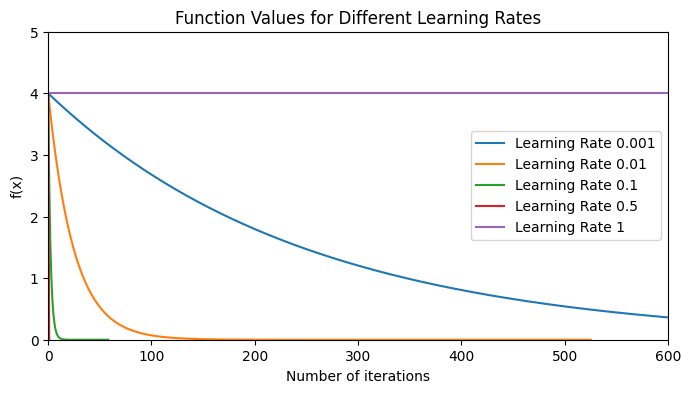

In [ ]:
def gradient_descent_one_variable(initial_guess, learning_rate, max_iterations=1000, tolerance=1e-6):
    w = np.array(initial_guess)
    f_values = []
    for iteration in range(1, max_iterations + 1):
        f_value = objective_function(w)
        f_values.append(f_value)
        grad = gradient(w)
        w_new = w - learning_rate * grad
        if np.abs(w_new - w) < tolerance:
            print(f"Converged after {iteration} iterations.")
            break
        w = w_new
    return f_values
initial_guess = [-1]
learning_rates = [0.001, 0.01, 0.1, 0.5, 1]
plt.figure(figsize=(8, 4))
for learning_rate in learning_rates:
    f_values = gradient_descent_one_variable(initial_guess, learning_rate)
    plt.plot(f_values, label=f'Learning Rate {learning_rate}')
plt.xlabel("Number of iterations")
plt.ylabel("f(x)")
plt.title("Function Values for Different Learning Rates")
plt.legend()
plt.xlim(0, 600)
plt.ylim(0, 5)
plt.show()

Converged after 61 iterations.
Initial Guess: -2, Learning Rate: 0.1, Optimized Parameter: 0.9999954025133773, Minimum Value: 2.1136883246247314e-11


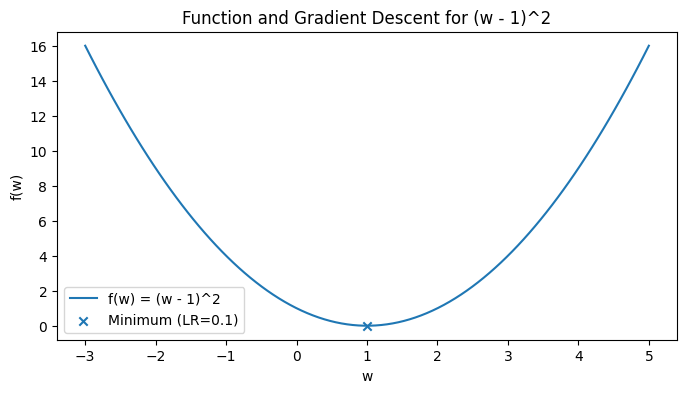

In [ ]:
w_vals = np.linspace(-3, 5, 100)
f_values = objective_function(w_vals)
learning_rate = 0.1
plt.figure(figsize=(8, 4))
plt.plot(w_vals, f_values, label='f(w) = (w - 1)^2')
plt.xlabel('w')
plt.ylabel('f(w)')
initial_guess = -2
w_star = gradient_descent(initial_guess, learning_rate)
min_value = objective_function(w_star)
print(f"Initial Guess: {initial_guess}, Learning Rate: {learning_rate}, Optimized Parameter: {w_star}, Minimum Value: {min_value}")
plt.scatter(w_star, min_value, label=f'Minimum (LR={learning_rate})', marker='x')
plt.legend()
plt.title('Function and Gradient Descent for (w - 1)^2')
plt.show()

4. 2*(w1-1)^2 + 2*(w2-1)^2

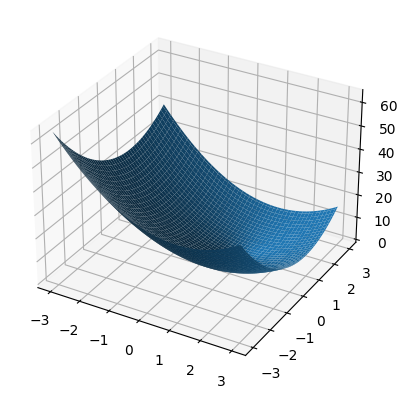

In [ ]:
def f(w1,w2):
  return 2*(w1-1)**2 + 2*(w2-1)**2
w1_vals = w2_vals = np.linspace(-3, 3, 100)
W1, W2 = np.meshgrid(w1_vals, w2_vals)
Z = f(W1, W2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W1, W2, Z)
plt.show()

In [ ]:
import numpy as np
import sympy as sp
w1, w2 = sp.symbols('w1 w2')
f = 2*(w1-1)**2 + 2*(w2-1)**2
hessians = sp.hessian(f, (w1, w2))
nh = hessians.subs({w1: 1.0, w2: 2.0})
print(nh)
nhnp = np.array(nh, dtype=float)
print(nhnp)
eigenvalues = np.linalg.eigvals(nhnp)
print("Numerical Hessian Matrix:")
print(nhnp)
print("\nEigenvalues:")
print(eigenvalues)
if all(eigenvalues >= 0):
  print("Function is convex")
else:
  print("Function is concave")

Matrix([[4, 0], [0, 4]])
[[4. 0.]
 [0. 4.]]
Numerical Hessian Matrix:
[[4. 0.]
 [0. 4.]]

Eigenvalues:
[4. 4.]
Function is convex


In [ ]:
def objective_function(w):
    return 2*(w[0]-1)**2 + 2*(w[1]-1)**2
def gradient(w):
    return np.array([4 * (w[0]-1), 4 * (w[1]-1)])
def gradient_descent(initial_guess, learning_rate, max_iterations=10, tolerance=1e-6):
    w = np.array(initial_guess)
    for _ in range(max_iterations):
        grad = gradient(w)
        w_new = w - learning_rate * grad
        if np.all(np.abs(w_new - w) < tolerance):
            break
        w = w_new
    return w
initial_guesses = [np.array([-1, 1])]
learning_rates = [0.001, 0.1, 0.5, 1, 5]
for initial_guess in initial_guesses:
    for learning_rate in learning_rates:
        optimized_param = gradient_descent(initial_guess, learning_rate)
        min_value = objective_function(optimized_param)
        print(f"Initial Guess: {initial_guess}, Learning Rate: {learning_rate}, Optimized Parameter: {optimized_param}, Minimum Value: {min_value}")

Initial Guess: [-1  1], Learning Rate: 0.001, Optimized Parameter: [-0.92142475  1.        ], Minimum Value: 7.383746116811225
Initial Guess: [-1  1], Learning Rate: 0.1, Optimized Parameter: [0.98790676 1.        ], Minimum Value: 0.0002924926752050406
Initial Guess: [-1  1], Learning Rate: 0.5, Optimized Parameter: [-1.  1.], Minimum Value: 8.0
Initial Guess: [-1  1], Learning Rate: 1, Optimized Parameter: [-118097       1], Minimum Value: 27894275208
Initial Guess: [-1  1], Learning Rate: 5, Optimized Parameter: [-12262132515601               1], Minimum Value: 6540062722206128776


<ipython-input-73-40eeefcef553>:2: RuntimeWarning: overflow encountered in long_scalars
  return 2*(w[0]-1)**2 + 2*(w[1]-1)**2


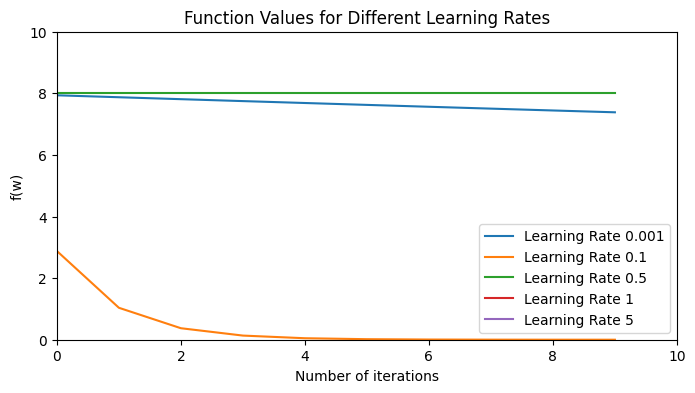

In [ ]:
def gradient_descent(initial_guess, learning_rate, max_iterations=10, tolerance=1e-6):
    w = np.array(initial_guess)
    f_values = []
    for _ in range(max_iterations):
        grad = gradient(w)
        w = w - learning_rate * grad
        f_value = objective_function(w)
        f_values.append(f_value)
    return f_values
plt.figure(figsize=(8,4))
for learning_rate in learning_rates:
    f_values = gradient_descent(initial_guess, learning_rate)
    plt.plot(f_values, label=f'Learning Rate {learning_rate}')
plt.xlabel("Number of iterations")
plt.ylabel("f(w)")
plt.title("Function Values for Different Learning Rates")
plt.legend()
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

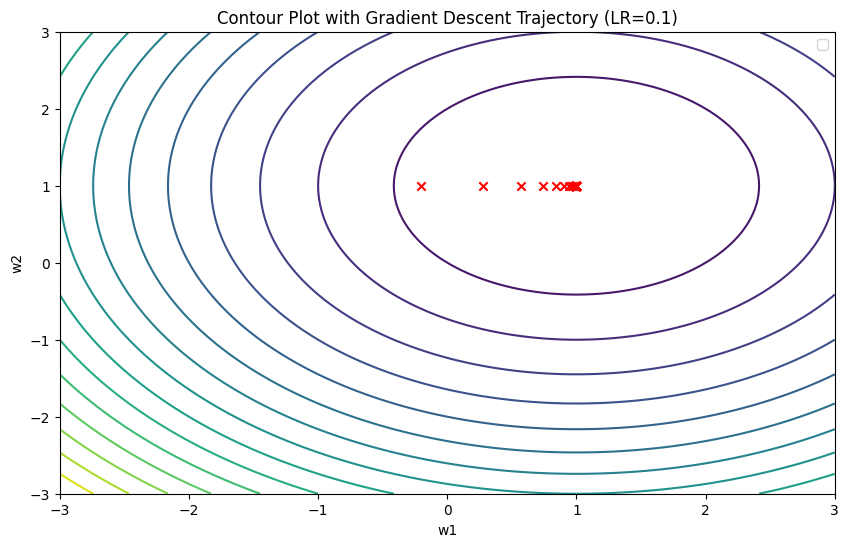

In [ ]:
def gradient_descent(initial_guess, learning_rate, max_iterations=1000, tolerance=1e-6):
    w = np.array(initial_guess)
    w_history = [w.copy()]
    for _ in range(max_iterations):
        grad = gradient(w)
        w = w - learning_rate * grad
        w_history.append(w.copy())
        if np.linalg.norm(grad) < tolerance:
            break
    return w_history
w1_vals = np.linspace(-3, 3, 100)
w2_vals = np.linspace(-3, 3, 100)
w1_mesh, w2_mesh = np.meshgrid(w1_vals, w2_vals)
f_values = objective_function([w1_mesh, w2_mesh])
learning_rate = 0.1
initial_guess = np.array([-1, 1])
w_history = gradient_descent(initial_guess, learning_rate)
plt.figure(figsize=(10, 6))
contour = plt.contour(w1_mesh, w2_mesh, f_values, levels=20, cmap='viridis')
plt.xlabel('w1')
plt.ylabel('w2')
for i in range(1, len(w_history)):
    plt.scatter(w_history[i][0], w_history[i][1], c='red', marker='x')
plt.legend()
plt.title('Contour Plot with Gradient Descent Trajectory (LR=0.1)')
plt.show()

Question 2.

Implement batch gradient descent, stochastic gradient descent and minibatch gradient descent for the func-
tion f(w) = Pm

i=1(yi − (w0 + w1xi))2 where m is the number of data samples in the dataset provide.
1. Implement parts 1-3 of the previous question in the context of the loss function f(w) = Pm
i=1(yi −

(w0 + w1xi))2
.

2. Create a Matplotlib animation of the contour plot. The different frames in the animation correspond
to different iterations of gradient descent applied on the dataset to learn w0 and w1. For each iteration,
draw the current value of w(t) on the contour plot and also an arrow to the next w(t+1) as learnt by
gradient update rule. The overall title of the plot shows the iteration number and convergence. Use a
legend to show the results of all three algorithms On a single plot. Comment on your observations.

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("q2a.csv")
data.head(10)

,x,y
0,3504,18.0
1,3693,15.0
2,3436,18.0
3,3433,16.0
4,3449,17.0
5,4341,15.0
6,4354,14.0
7,4312,14.0
8,4425,14.0
9,3850,15.0


In [ ]:
from sklearn.preprocessing import StandardScaler
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

# Loss function: f(w) = Σ(yi - (w0 + w1xi))^2
def loss_function(w0, w1, X, y):
    return np.sum((y - (w0 + w1 * X))**2)

# Gradient for the loss function
def gradient(w0, w1, X, y):
    dw0 = -2 * np.sum(y - (w0 + w1 * X))
    dw1 = -2 * np.sum((y - (w0 + w1 * X)) * X)
    return dw0, dw1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
def batch_gradient_descent(X, y, learning_rate, max_iterations=1000, tolerance=1e-6):
    w = np.random.randn(2, 1)
    for iteration in range(max_iterations):
        dw0, dw1 = gradient(w[0], w[1], X, y)
        w -= learning_rate * np.array([dw0, dw1]).reshape(-1, 1)
        if np.linalg.norm(np.array([dw0, dw1])) < tolerance:
            break
    return w

In [ ]:
def stochastic_gradient_descent(X, y, learning_rate, max_iterations=1000, tolerance=1e-6):
    w = np.random.randn(2, 1)
    m = len(X)
    for iteration in range(max_iterations):
        for i in range(m):
            dw0, dw1 = gradient(w[0], w[1], X[i], y[i])
            w -= learning_rate * np.array([dw0, dw1]).reshape(-1, 1)
        if np.linalg.norm(np.array([dw0, dw1])) < tolerance:
            break
    return w

In [ ]:
def minibatch_gradient_descent(X, y, learning_rate, batch_size=10, max_iterations=1000, tolerance=1e-6):
    w = np.random.randn(2, 1)
    m = len(X)
    for iteration in range(max_iterations):
        indices = np.random.choice(m, batch_size, replace=False)
        X_batch, y_batch = X[indices], y[indices]
        dw0, dw1 = gradient(w[0], w[1], X_batch, y_batch)
        w -= learning_rate * np.array([dw0, dw1]).reshape(-1, 1)
        if np.linalg.norm(np.array([dw0, dw1])) < tolerance:
            break
    return w

In [ ]:
learning_rate = 0.01
max_iterations = 1000
tolerance = 1e-6
w_batch = batch_gradient_descent(X_scaled, y, learning_rate)
w_sgd = stochastic_gradient_descent(X, y, learning_rate, max_iterations, tolerance)
w_minibatch = minibatch_gradient_descent(X, y, learning_rate, batch_size=10, max_iterations=max_iterations, tolerance=tolerance)
print("Batch Gradient Descent Result:")
print("w0:", w_batch[0][0], "w1:", w_batch[1][0])
print("\nStochastic Gradient Descent Result:")
print("w0:", w_sgd[0][0], "w1:", w_sgd[1][0])
print("\nMini-Batch Gradient Descent Result:")
print("w0:", w_minibatch[0][0], "w1:", w_minibatch[1][0])

Batch Gradient Descent Result:
w0: -3.0263418182619866 w1: 0.9910332078068049

Stochastic Gradient Descent Result:
w0: 4.255609543824685 w1: 2.8474106016049006

Mini-Batch Gradient Descent Result:
w0: 4.175391422020651 w1: 2.8888579099430705


In [ ]:
learning_rate = 0.01
n_iterations = 1000
n_epochs = 50
batch_size = 10

theta_batch, loss_history_batch = batch_gradient_descent(X_b, y, learning_rate, n_iterations)
theta_stochastic, loss_history_stochastic = stochastic_gradient_descent(X_b, y, learning_rate, n_epochs)
theta_minibatch, loss_history_minibatch = minibatch_gradient_descent(X_b, y, learning_rate, n_iterations, batch_size)

# Plot loss curves
plt.figure(figsize=(12, 8))
plt.plot(loss_history_batch, label='Batch Gradient Descent')
plt.plot(loss_history_stochastic, label='Stochastic Gradient Descent')
plt.plot(loss_history_minibatch, label=f'Minibatch Gradient Descent (batch_size={batch_size})')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve for Different Gradient Descent Algorithms')
plt.legend()
plt.show()

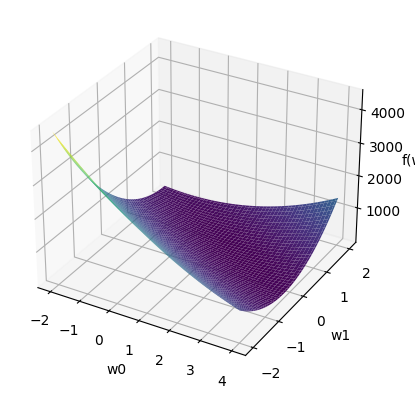

The function is convex.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the loss function
def f(w, x, y):
    return np.sum((y - (w[0] + w[1] * x))**2)

# Generate sample data
x = np.linspace(0, 4, 50)
y = 2 + 0.5 * x + np.random.randn(50) * 0.2  # Add some noise

# Create a grid of w0 and w1 values
w0_vals = np.linspace(-2, 4, 100)
w1_vals = np.linspace(-2, 2, 100)
W0, W1 = np.meshgrid(w0_vals, w1_vals)

# Evaluate the loss function at each grid point
Z = np.zeros_like(W0)
for i in range(len(w0_vals)):
    for j in range(len(w1_vals)):
        Z[i, j] = f([W0[i, j], W1[i, j]], x, y)

# Create the surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W0, W1, Z, cmap='viridis')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('f(w)')
plt.show()

# Quantitative verification of convexity
# Check the Hessian matrix for positive definiteness
H = np.zeros((2, 2))
for i in range(len(x)):
    H += 2 * np.array([[1, x[i]], [x[i], x[i]**2]])
if np.all(np.linalg.eigvals(H) > 0):
    print("The function is convex.")
else:
    print("The function is non-convex.")


In [ ]:
def objective_function(w, x, y):
    return np.sum((y - (w[0] + w[1] * x))**2)
def gradient(w, x, y):
    return np.array([
        -2 * np.sum(y - (w[0] + w[1] * x)),
        -2 * np.sum((y - (w[0] + w[1] * x)) * x)
    ])
def gradient_descent(initial_guess, learning_rate, x, y, max_iterations=10, tolerance=1e-6):
    w = np.array(initial_guess)
    for _ in range(max_iterations):
        grad = gradient(w, x, y)
        w_new = w - learning_rate * grad
        if np.all(np.abs(w_new - w) < tolerance):
            break
        w = w_new
    return w
x = np.linspace(0, 4, 50)
y = 2 + 0.5 * x + np.random.randn(50) * 0.2  # Add some noise
initial_guesses = [np.array([-1, -1]), np.array([0, 0]), np.array([1, 1])]
learning_rates = [0.001, 0.1, 0.5, 1, 5]
for initial_guess in initial_guesses:
    for learning_rate in learning_rates:
        optimized_param = gradient_descent(initial_guess, learning_rate, x, y)
        min_value = objective_function(optimized_param, x, y)
        print(f"Initial Guess: {initial_guess}, Learning Rate: {learning_rate}, Optimized Parameter: {optimized_param}, Minimum Value: {min_value}")

Initial Guess: [-1 -1], Learning Rate: 0.001, Optimized Parameter: [0.3241793  1.13942447], Minimum Value: 39.01258507084241
Initial Guess: [-1 -1], Learning Rate: 0.1, Optimized Parameter: [-5.99336768e+17 -1.54705718e+18], Minimum Value: 8.481507412912953e+38
Initial Guess: [-1 -1], Learning Rate: 0.5, Optimized Parameter: [-6.67274462e+24 -1.72242353e+25], Minimum Value: 1.051332792798992e+53
Initial Guess: [-1 -1], Learning Rate: 1, Optimized Parameter: [-6.94494737e+27 -1.79268673e+28], Minimum Value: 1.138856806711535e+59
Initial Guess: [-1 -1], Learning Rate: 5, Optimized Parameter: [-6.87087962e+34 -1.77356776e+35], Minimum Value: 1.114694561040654e+73
Initial Guess: [0 0], Learning Rate: 0.001, Optimized Parameter: [0.74836972 0.97518732], Minimum Value: 22.84483510925417
Initial Guess: [0 0], Learning Rate: 0.1, Optimized Parameter: [-2.85862388e+17 -7.37891424e+17], Minimum Value: 1.929502021579842e+38
Initial Guess: [0 0], Learning Rate: 0.5, Optimized Parameter: [-3.182662

<ipython-input-8-5f13bbbf1004>:58: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(w0, w1)


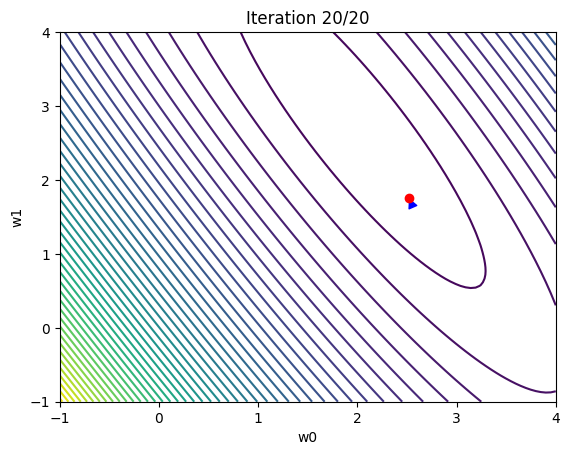

Saved animation to: gradient_descent_animation.gif


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.lines import Line2D
from matplotlib.patches import FancyArrowPatch
data=pd.read_csv('q2a.csv')
x = data['x'].values
y = data['y'].values
def loss_function(w0, w1, x, y):
    return np.mean((y - (w0 + w1 * x))**2)
def gradient(w0, w1, x, y):
    N = len(y)
    dw0 = (-2/N) * np.sum(y - (w0 + w1 * x))
    dw1 = (-2/N) * np.sum((y - (w0 + w1 * x)) * x)
    return dw0, dw1
def gradient_descent(x, y, learning_rate=0.1, iterations=100):
    w0 = 0
    w1 = 0
    w_history = [(w0, w1)]
    for _ in range(iterations):
        dw0, dw1 = gradient(w0, w1, x, y)
        w0 -= learning_rate * dw0
        w1 -= learning_rate * dw1
        w_history.append((w0, w1))
    return w_history
iterations = 20
w_history = gradient_descent(x, y, learning_rate=0.1, iterations=iterations)
w0_vals = np.linspace(-1, 4, 50)
w1_vals = np.linspace(-1, 4, 50)
W0, W1 = np.meshgrid(w0_vals, w1_vals)
Z = np.array([[loss_function(w0, w1, x, y) for w0 in w0_vals] for w1 in w1_vals])
fig, ax = plt.subplots()
contour = ax.contour(W0, W1, Z, levels=50)
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_title('Gradient Descent Contour Plot')
line, = ax.plot([], [], marker='o', color='red')
arrow = FancyArrowPatch((0, 0), (0, 0), color='blue', arrowstyle='-|>', mutation_scale=15)
ax.add_patch(arrow)
def animate(frame):
    w0, w1 = w_history[frame]
    line.set_data(w0, w1)
    if frame < iterations:
        dw0, dw1 = gradient(w0, w1, x, y)
        arrow.set_positions((w0, w1), (w0 - 0.1 * dw0, w1 - 0.1 * dw1))
    ax.set_title(f'Iteration {frame}/{iterations}')
ani = FuncAnimation(fig, animate, frames=iterations + 1, interval=100, repeat=False)
mp4_path = "gradient_descent_animation1.mp4"
ani.save(mp4_path, writer="ffmpeg", fps=10)
animate(iterations)
plt.show()
print(f"Saved animation to: {gif_path}")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.lines import Line2D
from matplotlib.patches import FancyArrowPatch
data=pd.read_csv('q2a.csv')
x = data['x'].values
y = data['y'].values
def loss_function(w0, w1, x, y):
    return np.mean((y - (w0 + w1 * x))**2)
def gradient(w0, w1, x, y):
    N = len(y)
    dw0 = (-2/N) * np.sum(y - (w0 + w1 * x))
    dw1 = (-2/N) * np.sum((y - (w0 + w1 * x)) * x)
    return dw0, dw1
def gradient_descent(x, y, learning_rate=0.1, iterations=100):
    w0 = 0
    w1 = 0
    w_history = [(w0, w1)]
    for _ in range(iterations):
        dw0, dw1 = gradient(w0, w1, x, y)
        w0 -= learning_rate * dw0
        w1 -= learning_rate * dw1
        w_history.append((w0, w1))
    return w_history
iterations = 10
w_history = gradient_descent(x, y, learning_rate=0.1, iterations=iterations)
w0_vals = np.linspace(-1, 4, 50)
w1_vals = np.linspace(-1, 4, 50)
W0, W1 = np.meshgrid(w0_vals, w1_vals)
Z = np.array([[loss_function(w0, w1, x, y) for w0 in w0_vals] for w1 in w1_vals])
fig, ax = plt.subplots()
contour = ax.contour(W0, W1, Z, levels=50)
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_title('Gradient Descent Contour Plot')
line, = ax.plot([], [], marker='o', color='red')
arrow = FancyArrowPatch((0, 0), (0, 0), color='blue', arrowstyle='-|>', mutation_scale=15)
ax.add_patch(arrow)
def animate(frame):
    w0, w1 = w_history[frame]
    line.set_data(w0, w1)
    if frame < iterations:
        dw0, dw1 = gradient(w0, w1, x, y)
        arrow.set_positions((w0, w1), (w0 - 0.1 * dw0, w1 - 0.1 * dw1))
    ax.set_title(f'Iteration {frame}/{iterations}')
ani = FuncAnimation(fig, animate, frames=iterations + 1, interval=100, repeat=False)
mp4_path = "gradient_descent_animation2.mp4"
ani.save(mp4_path, writer="ffmpeg", fps=10)
animate(iterations)
plt.show()
print(f"Saved animation to: {gif_path}")

<ipython-input-1-bd945e5167cb>:58: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(w0, w1)
